<a href="https://www.kaggle.com/code/yomritoyj06/k-nearestneigbours?scriptVersionId=188502472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

In [3]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
339,89812,M,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,...,30.73,202.4,2906.0,0.15150,0.2678,0.4819,0.20890,0.2593,0.07738,NaN
217,8811779,B,10.20,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,...,24.47,75.4,403.7,0.09527,0.1397,0.1925,0.03571,0.2868,0.07809,NaN
430,907914,M,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,...,27.57,125.4,832.7,0.14190,0.7090,0.9019,0.24750,0.2866,0.11550,NaN
512,915691,M,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,...,29.66,113.3,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090,NaN
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,...,24.89,133.5,1189.0,0.17030,0.3934,0.5018,0.25430,0.3109,0.09061,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df['diagnosis'].nunique()

2

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
ohe = OneHotEncoder()

In [10]:
y = df['diagnosis']
X = df.iloc[:, 2:-1]

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
clf = KNeighborsClassifier()

In [17]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_train, clf.predict(X_train)))
print(accuracy_score(y_test, clf.predict(X_test)))

0.9846153846153847
0.956140350877193


In [20]:
pca = PCA()

In [21]:
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [22]:
pca.components_.shape  #gives the eigen vectors, 30 eigen vectors having 30 components in 30 axes

(30, 30)

In [23]:
pca.explained_variance_ratio_*100

array([4.58550116e+01, 1.75175919e+01, 9.57697679e+00, 6.70866226e+00,
       5.28052447e+00, 3.91784457e+00, 2.29125499e+00, 1.62253931e+00,
       1.33167647e+00, 1.16959472e+00, 9.57703426e-01, 8.24168349e-01,
       7.75676523e-01, 5.29618472e-01, 2.94511197e-01, 2.61030331e-01,
       2.09958522e-01, 1.74016167e-01, 1.59682797e-01, 1.03501480e-01,
       9.63682951e-02, 8.99506701e-02, 8.33896930e-02, 6.25826591e-02,
       5.18822194e-02, 2.44539699e-02, 2.16777097e-02, 5.47552164e-03,
       2.24934066e-03, 4.25511174e-04])

In [24]:
np.cumsum(pca.explained_variance_ratio_*100)

array([ 45.85501165,  63.37260358,  72.94958036,  79.65824263,
        84.9387671 ,  88.85661167,  91.14786665,  92.77040596,
        94.10208243,  95.27167715,  96.22938057,  97.05354892,
        97.82922544,  98.35884392,  98.65335511,  98.91438544,
        99.12434397,  99.29836013,  99.45804293,  99.56154441,
        99.65791271,  99.74786338,  99.83125307,  99.89383573,
        99.94571795,  99.97017192,  99.99184963,  99.99732515,
        99.99957449, 100.        ])

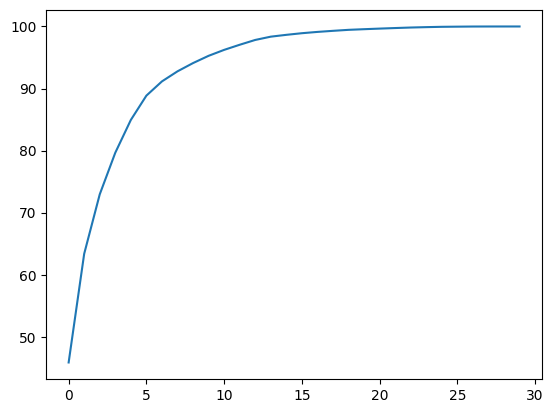

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

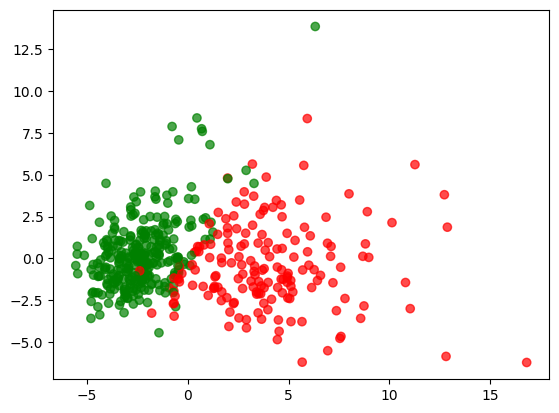

In [26]:
#Red color means malignant and green color means benign
colors = {'M': 'red', 'B': 'green'}
color_map = y_train.map(colors)
plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c = color_map, alpha = 0.7)

In [27]:
from sklearn.preprocessing import LabelBinarizer

# Assuming your target column is named 'target'
label_binarizer = LabelBinarizer()
y_dum = label_binarizer.fit_transform(y_train)

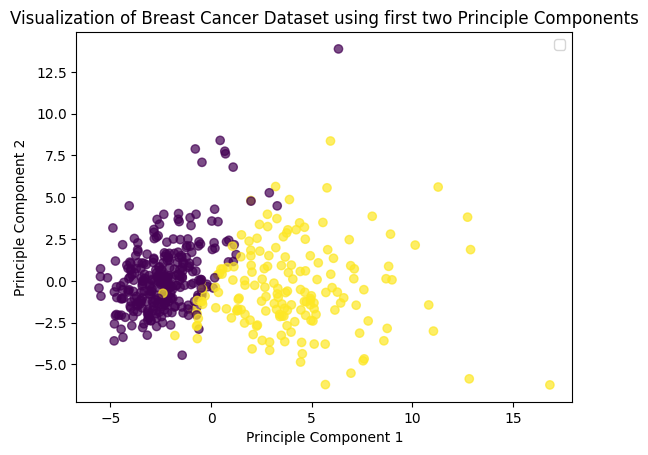

In [28]:
plt.scatter(X_train_trans[:, 0], X_train_trans[:, 1], c = y_dum, cmap = 'viridis', alpha = 0.7)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('Visualization of Breast Cancer Dataset using first two Principle Components')
plt.legend()
plt.show()

In [29]:
clf1 = KNeighborsClassifier()

In [30]:
clf1.fit(X_train_trans, y_train)

KNeighborsClassifier()

In [31]:
print(accuracy_score(y_train, clf1.predict(X_train_trans)))
print(accuracy_score(y_test, clf1.predict(X_test_trans)))

0.9846153846153847
0.956140350877193
